In [1]:
text = 'Hi this is a small sentence'
seq_len=3
words=text.split()
words

['Hi', 'this', 'is', 'a', 'small', 'sentence']

In [2]:
lines=[]
for i in range(seq_len, len(words)+1):
    line=' '.join(words[i-seq_len:i])
    lines.append(line)

lines

['Hi this is', 'this is a', 'is a small', 'a small sentence']

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer= Tokenizer()
tokenizer.fit_on_texts(lines)
sequences= tokenizer.texts_to_sequences(lines)
sequences

[[5, 3, 1], [3, 1, 2], [1, 2, 4], [2, 4, 6]]

In [5]:
print(tokenizer.index_word)

{1: 'is', 2: 'a', 3: 'this', 4: 'small', 5: 'hi', 6: 'sentence'}


In [10]:
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.models import Sequential
model=Sequential()
vocab_size= len(tokenizer.index_word)+1
model.add(Embedding(input_dim=vocab_size, output_dim=8, input_length=2))
model.add(LSTM(8))
model.add(Dense(8, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))


C:\Users\Shahid Ali\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [11]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [12]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 147s 13us/step


In [13]:
len(X_train)

60000

In [14]:
len(X_test)

10000

In [15]:
X_train[0].shape

(28, 28)

In [16]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

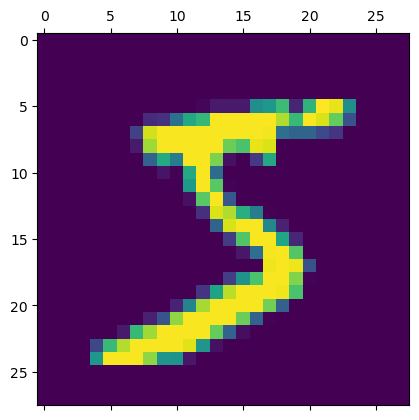

In [17]:
plt.matshow(X_train[0])

In [18]:
y_train[0]

5

In [20]:
X_train = X_train / 255
X_test = X_test / 255

In [21]:
X_train[0]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [22]:
X_train.shape

(60000, 28, 28)

In [23]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [24]:
X_train_flattened.shape

(60000, 784)

In [25]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [26]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

C:\Users\Shahid Ali\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8200 - loss: 0.7141
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9122 - loss: 0.3134
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9189 - loss: 0.2924
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9266 - loss: 0.2672
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9264 - loss: 0.2657


In [27]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9163 - loss: 0.3011


[0.26472264528274536, 0.926800012588501]

In [28]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([1.7577665e-02, 2.9426724e-07, 6.2748954e-02, 9.6232051e-01,
       1.6230450e-03, 7.8165948e-02, 1.2477784e-06, 9.9979383e-01,
       9.2989907e-02, 6.9160736e-01], dtype=float32)

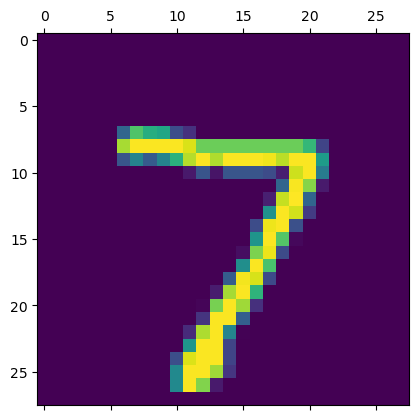

In [29]:
plt.matshow(X_test[0])

In [30]:
np.argmax(y_predicted[0])

7

In [31]:
y_predicted_labels=[]
for i in y_predicted:
    y_predicted_labels.append(np.argmax(i))

In [32]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [33]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    5,    6,    2,    2,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   4,    9,  920,   16,    8,    4,   13,   11,   44,    3],
       [   3,    0,   18,  918,    0,   25,    2,   12,   25,    7],
       [   1,    1,    3,    1,  915,    0,   11,    4,   10,   36],
       [   8,    2,    3,   31,    8,  774,   16,    8,   36,    6],
       [   9,    3,    7,    1,    7,   10,  913,    2,    6,    0],
       [   1,    6,   23,    5,    6,    0,    0,  954,    3,   30],
       [   5,    6,    5,   17,    9,   22,    9,   11,  883,    7],
       [  10,    7,    1,    9,   24,    7,    0,   24,    8,  919]])>

Text(95.72222222222221, 0.5, 'Truth')

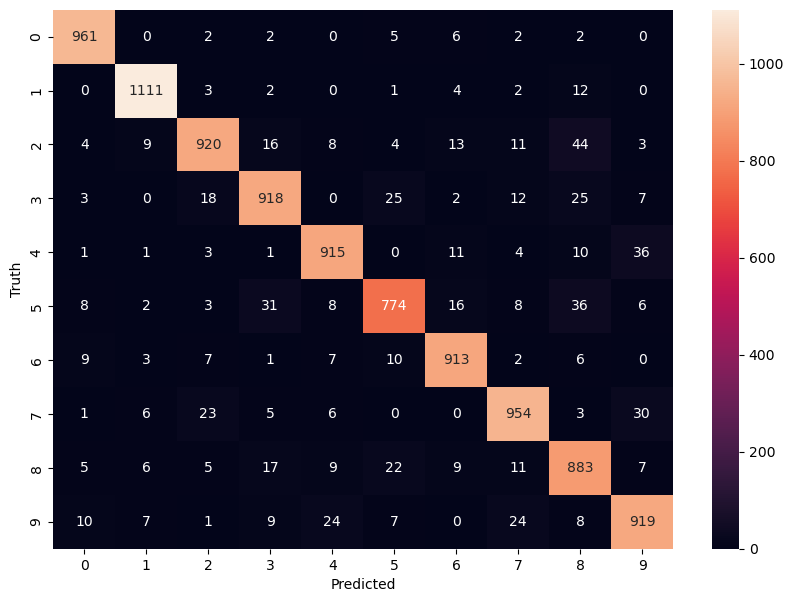

In [34]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)


C:\Users\Shahid Ali\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8726 - loss: 0.4550
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9641 - loss: 0.1281
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9747 - loss: 0.0885
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9803 - loss: 0.0643
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9849 - loss: 0.0496


In [36]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9737 - loss: 0.0873


[0.07194171100854874, 0.9775000214576721]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

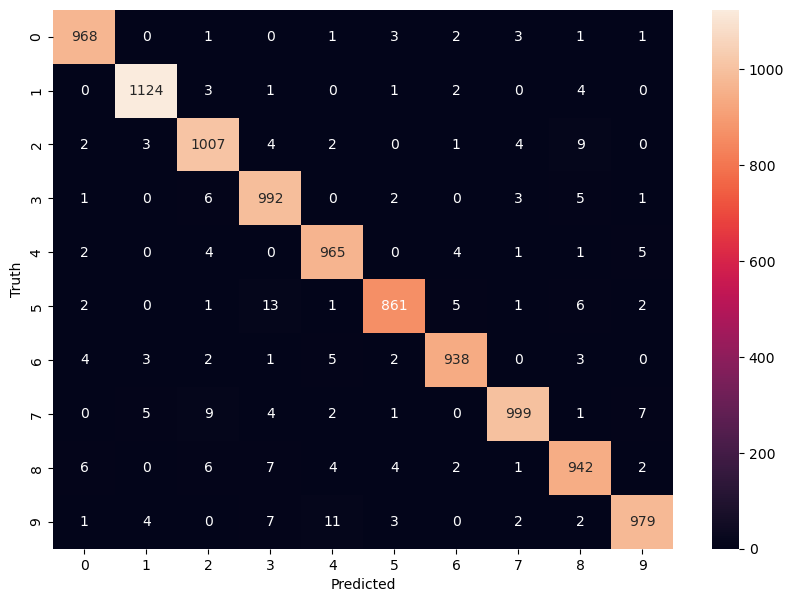

In [37]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [38]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

C:\Users\Shahid Ali\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8692 - loss: 0.4566
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9606 - loss: 0.1346
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9737 - loss: 0.0889
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9808 - loss: 0.0641
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9847 - loss: 0.0498
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9887 - loss: 0.0389
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9911 - loss: 0.0303
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9923 - loss: 0.0261
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9932 - loss: 0.0217
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9953 - loss: 0.0170


In [39]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9739 - loss: 0.1008


[0.08512360602617264, 0.977400004863739]